## Analysis for Online Course Business Optimization

#### Objective
 - Unveiling Insights and Enhancing Business Performance

#### Import Libraries

In [179]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

#### Load dataset 

In [180]:
data = pd.read_csv(r"C:\Users\inoke\OneDrive\デスクトップ\10Alytics\10Alytics_Internship\EdSigh Ed-Tech.csv")
data.head()

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,4/7/2013,Free
2,133536,50855,Stock Market Investing for Beginners,0,2698,15,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,12/25/2013,Free
3,151668,29167,Introduction to Financial Modeling,0,1463,8,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,5/27/2014,Free
4,648826,24481,The Complete Financial Analyst Course 2017,195,2347,174,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,1/21/2016,Paid


### Data Observation

In [181]:
data.shape

(3676, 13)

In [182]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Course_ID,3676.0,NaN,NaN,NaN,675753.495103,343130.440299,8324.0,407474.0,687692.0,960814.0,1282064.0
Num_Subscribers,3676.0,NaN,NaN,NaN,3199.260881,9486.582966,0.0,112.0,912.5,2558.0,268923.0
Course_Title,3676,3663,Acoustic Blues Guitar Lessons,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,3676.0,NaN,NaN,NaN,66.115343,61.056073,0.0,20.0,45.0,95.0,200.0
Num_Review,3676.0,NaN,NaN,NaN,156.309848,935.674518,0.0,4.0,18.0,67.0,27445.0
Num_Lectures,3676.0,NaN,NaN,NaN,40.129761,50.398507,0.0,15.0,25.0,46.0,779.0
Level,3676,4,All Levels,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3676.0,NaN,NaN,NaN,0.610868,0.334287,0.0,0.28,0.76,0.93,1.0
Content_Duration,3676.0,NaN,NaN,NaN,4.096137,6.054948,0.0,1.0,2.0,4.5,78.5
Published_Timestamp,3676,3672,2017-02-07T17:20:39Z,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3676 non-null   int64  
 1   Num_Subscribers      3676 non-null   int64  
 2   Course_Title         3676 non-null   object 
 3   Price                3676 non-null   int64  
 4   Num_Review           3676 non-null   int64  
 5   Num_Lectures         3676 non-null   int64  
 6   Level                3676 non-null   object 
 7   Rating               3676 non-null   float64
 8   Content_Duration     3676 non-null   float64
 9   Published_Timestamp  3676 non-null   object 
 10  Subject              3676 non-null   object 
 11  Date_Published       3676 non-null   object 
 12  Course_Type          3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


In [184]:
# Overview of unique values
data.nunique(axis=0)

Course_ID              3672
Num_Subscribers        2197
Course_Title           3663
Price                    38
Num_Review              511
Num_Lectures            229
Level                     4
Rating                  101
Content_Duration        105
Published_Timestamp    3672
Subject                   4
Date_Published         1210
Course_Type               2
dtype: int64

Note: 
 - The counts of unique features in Course_ID and Course_Title exhibit unexpected disparities. 
 - In addition, they both show different counts in compared to their raw sets as provided in the data.info() above (there is a possibility of duplication). This should not happen since they are supposed to be unique identifiers


### Data Inspection and Cleaning

In [185]:
# Check for missing data

data.isnull().sum()

Course_ID              0
Num_Subscribers        0
Course_Title           0
Price                  0
Num_Review             0
Num_Lectures           0
Level                  0
Rating                 0
Content_Duration       0
Published_Timestamp    0
Subject                0
Date_Published         0
Course_Type            0
dtype: int64

Note: No missing data

In [186]:
# Check for duplicates in the dataframe

data.duplicated().sum()

0

Note: No duplicated data in the dataframe

In [187]:
# Check for duplicates in the Course_ID

data.duplicated(subset=['Course_ID']).sum()

4

Note: there are 4 duplicates in the Course_ID

In [188]:
# View the duplicated data

dup_Course_ID = data[data['Course_ID'].duplicated(keep=False)]
print(dup_Course_ID)

      Course_ID  Num_Subscribers  \
2645    1052304            11285   
2647     736940            11170   
2648     241590            11167   
2650     142666            11026   
3022    1052304            11285   
3023     736940            11170   
3024     241590            11167   
3025     142666            11026   

                                           Course_Title  Price  Num_Review  \
2645  JavaScript For Beginners : Learn JavaScript Fr...    195         102   
2647    Practical CSS Website Development: Crash Course     95          35   
2648  Make a professional website - 30 Day Guarantee...     20          34   
2650      Improved SEO with Rich Snippets and MicroData      0         228   
3022  JavaScript For Beginners : Learn JavaScript Fr...    195         102   
3023    Practical CSS Website Development: Crash Course     95          35   
3024  Make a professional website - 30 Day Guarantee...     20          34   
3025      Improved SEO with Rich Snippets and Micro

In [189]:
# Check for duplicates in the Course_Title

data.duplicated(subset=['Course_Title']).sum()

13

Note: there are 13 duplicates in the Course_Title

In [190]:
# View the duplicated data in the Course title
dup_Course_T = data[data['Course_Title'].duplicated(keep=False)]
dup_Course_T

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
1333,692920,1504,Creating an animated greeting card via Google ...,20,10,9,Intermediate Level,0.95,1.500000,2016-01-05T20:31:49Z,Graphic Design,1/5/2016,Paid
1432,699380,770,Creating an animated greeting card via Google ...,20,8,8,All Levels,0.94,1.000000,2016-05-06T15:54:32Z,Graphic Design,5/6/2016,Paid
1458,699376,549,Creating an animated greeting card via Google ...,20,10,8,Intermediate Level,0.94,1.000000,2016-04-12T01:24:14Z,Graphic Design,4/12/2016,Paid
1808,99324,8217,Acoustic Blues Guitar Lessons,0,109,10,Beginner Level,0.30,1.000000,2013-09-30T20:45:20Z,Musical Instruments,9/30/2013,Free
1913,112314,1284,Acoustic Blues Guitar Lessons,125,136,40,All Levels,0.78,12.500000,2013-11-28T08:54:00Z,Musical Instruments,11/28/2013,Paid
2104,647276,189,Acoustic Blues Guitar Lessons,75,18,101,All Levels,0.04,4.500000,2016-01-10T21:39:42Z,Musical Instruments,1/10/2016,Paid
2217,210020,70,Drum Lessons For Beginners,50,2,17,All Levels,0.11,1.500000,2014-05-17T18:24:30Z,Musical Instruments,5/17/2014,Paid
2325,217628,22,Aprende a tocar el acordeón de botones,50,4,21,All Levels,0.15,3.500000,2014-05-19T15:58:53Z,Musical Instruments,5/19/2014,Paid
2335,1152334,20,Aprende a tocar el acordeón de botones,50,6,24,Beginner Level,0.57,2.000000,2017-05-17T16:50:41Z,Musical Instruments,5/17/2017,Paid
2355,818786,14,Drum Lessons For Beginners,95,1,34,Beginner Level,0.16,2.500000,2016-04-13T21:02:15Z,Musical Instruments,4/13/2016,Paid


In [191]:
# Drop duplicates
data.drop_duplicates(subset=['Course_ID', 'Course_Title'], inplace=True)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3672 non-null   int64  
 1   Num_Subscribers      3672 non-null   int64  
 2   Course_Title         3672 non-null   object 
 3   Price                3672 non-null   int64  
 4   Num_Review           3672 non-null   int64  
 5   Num_Lectures         3672 non-null   int64  
 6   Level                3672 non-null   object 
 7   Rating               3672 non-null   float64
 8   Content_Duration     3672 non-null   float64
 9   Published_Timestamp  3672 non-null   object 
 10  Subject              3672 non-null   object 
 11  Date_Published       3672 non-null   object 
 12  Course_Type          3672 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 401.6+ KB


#### Datetime conversions

In [193]:
data[['Published_Timestamp','Date_Published']].head()

,Published_Timestamp,Date_Published
0,2013-04-20T02:25:22Z,4/20/2013
1,2013-04-07T21:39:25Z,4/7/2013
2,2013-12-25T19:53:34Z,12/25/2013
3,2014-05-27T16:22:16Z,5/27/2014
4,2016-01-21T01:38:48Z,1/21/2016


In [194]:
# Convert date objects into datetime features

data['Date_Published'] = pd.to_datetime(data['Date_Published'])

In [195]:
# Extract Years from the date_published

data['Year_Published'] = data['Date_Published'].dt.year
data['Year_Published'].dtype

dtype('int64')

In [196]:
# Number of Years the course in running

data['Years_Running'] = 2023 - data['Year_Published']

data[['Years_Running', 'Date_Published', 'Year_Published']].head()

,Years_Running,Date_Published,Year_Published
0,10,2013-04-20,2013
1,10,2013-04-07,2013
2,10,2013-12-25,2013
3,9,2014-05-27,2014
4,7,2016-01-21,2016


In [197]:
# Price brackets 

def price_brackets(i):
    """formulating group of prices for the courses"""
    if i == 0:
        return "0"
    elif i <= 50:
        return "0<, <=50"
    elif i <= 100:
        return "50<, <=100"
    elif i <=150:
        return "100<, <=150"
    else:
        return ">150"

data['Price_Groups'] = data['Price'].apply(price_brackets)


In [198]:
# Total Revenue for each course; Price * Number of Subscribers

data['Revenue'] = data['Price'] * data['Num_Subscribers']

### EDA

#### Univariate Analysis

<Figure size 400x200 with 0 Axes>

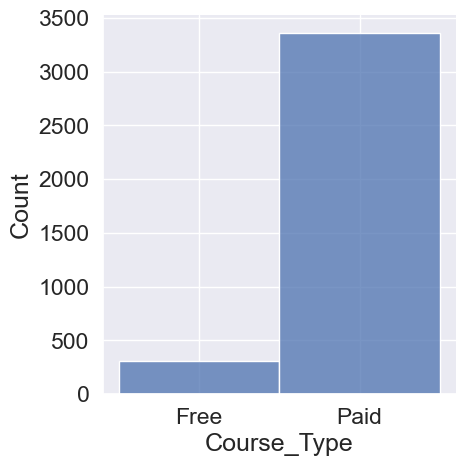

In [199]:
# Distribution of course types interms of payments
plt.figure(figsize=(4,2))
sns.displot(data['Course_Type'], kde=False, bins=5);

Note: Generally, more courses are under the payment subscription and those that are free are significantly less

<Figure size 500x200 with 0 Axes>

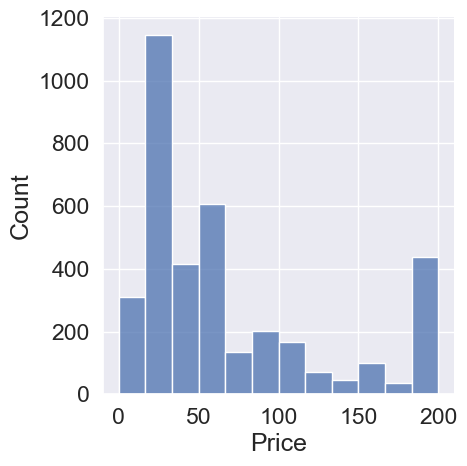

In [200]:
plt.figure(figsize=(5,2))
sns.displot(data['Price'], kde=False, bins=12);

Note:More courses are paid around 25, followed by those paid around 60 and those around 190. Less number of courses are those paid around 125, 140 and 175.

<Figure size 1000x200 with 0 Axes>

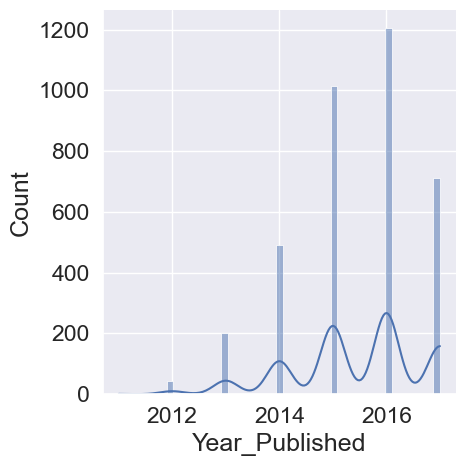

In [201]:
# Check the distribution of years of course publications

plt.figure(figsize=(10,2))
sns.displot(data['Year_Published'], kde=True);

Note: Most courses were published in the year 2016, followed up by year 2015, 2017, 2014, 2012 and 2011 in that order.
Also, the more courses were published per year from the year 2011 to year 2016, however, in the year 2017 less courses were published from the year before (i.e 2016)

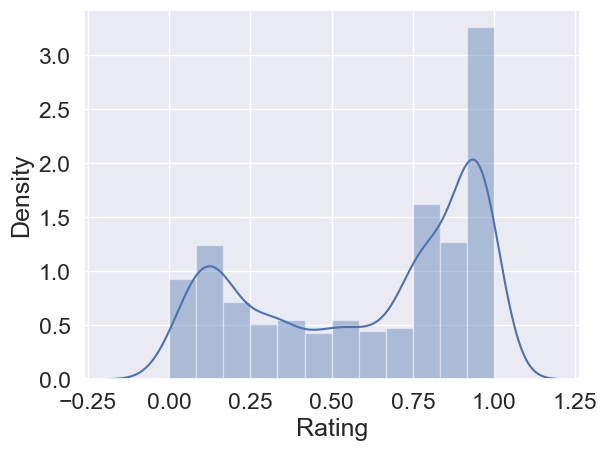

In [202]:
# Check the distribution of ratings

sns.distplot(data['Rating'], kde=True);

Note: More courses are rated between 0.76 and 1.0 with lesser courses rated between 0.3 to 0.7.
In addition, the ratings are not symmetrically distributed.

the coefficient of skewness for Ratings is Rating   -0.465912
dtype: float64


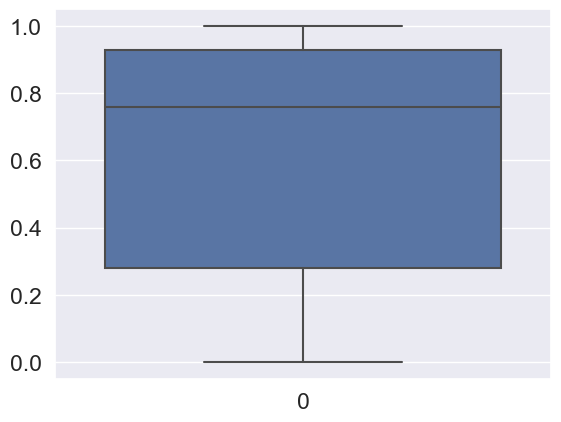

In [203]:
# check the Rating dispersion and skewness
sns.boxplot(data['Rating']);

# Check for skewness of ratings

from scipy.stats import skew
skew_r = data[['Rating']].skew()

print("the coefficient of skewness for Ratings is", skew_r )

Note: The Rating distributions are skewed to the left where a median Rating is higher than an average rating.

#### Bi-variate and Multi-variate Analysis

##### Analysis for course ratings

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3675
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Course_ID            3672 non-null   int64         
 1   Num_Subscribers      3672 non-null   int64         
 2   Course_Title         3672 non-null   object        
 3   Price                3672 non-null   int64         
 4   Num_Review           3672 non-null   int64         
 5   Num_Lectures         3672 non-null   int64         
 6   Level                3672 non-null   object        
 7   Rating               3672 non-null   float64       
 8   Content_Duration     3672 non-null   float64       
 9   Published_Timestamp  3672 non-null   object        
 10  Subject              3672 non-null   object        
 11  Date_Published       3672 non-null   datetime64[ns]
 12  Course_Type          3672 non-null   object        
 13  Year_Published       3672 non-nul

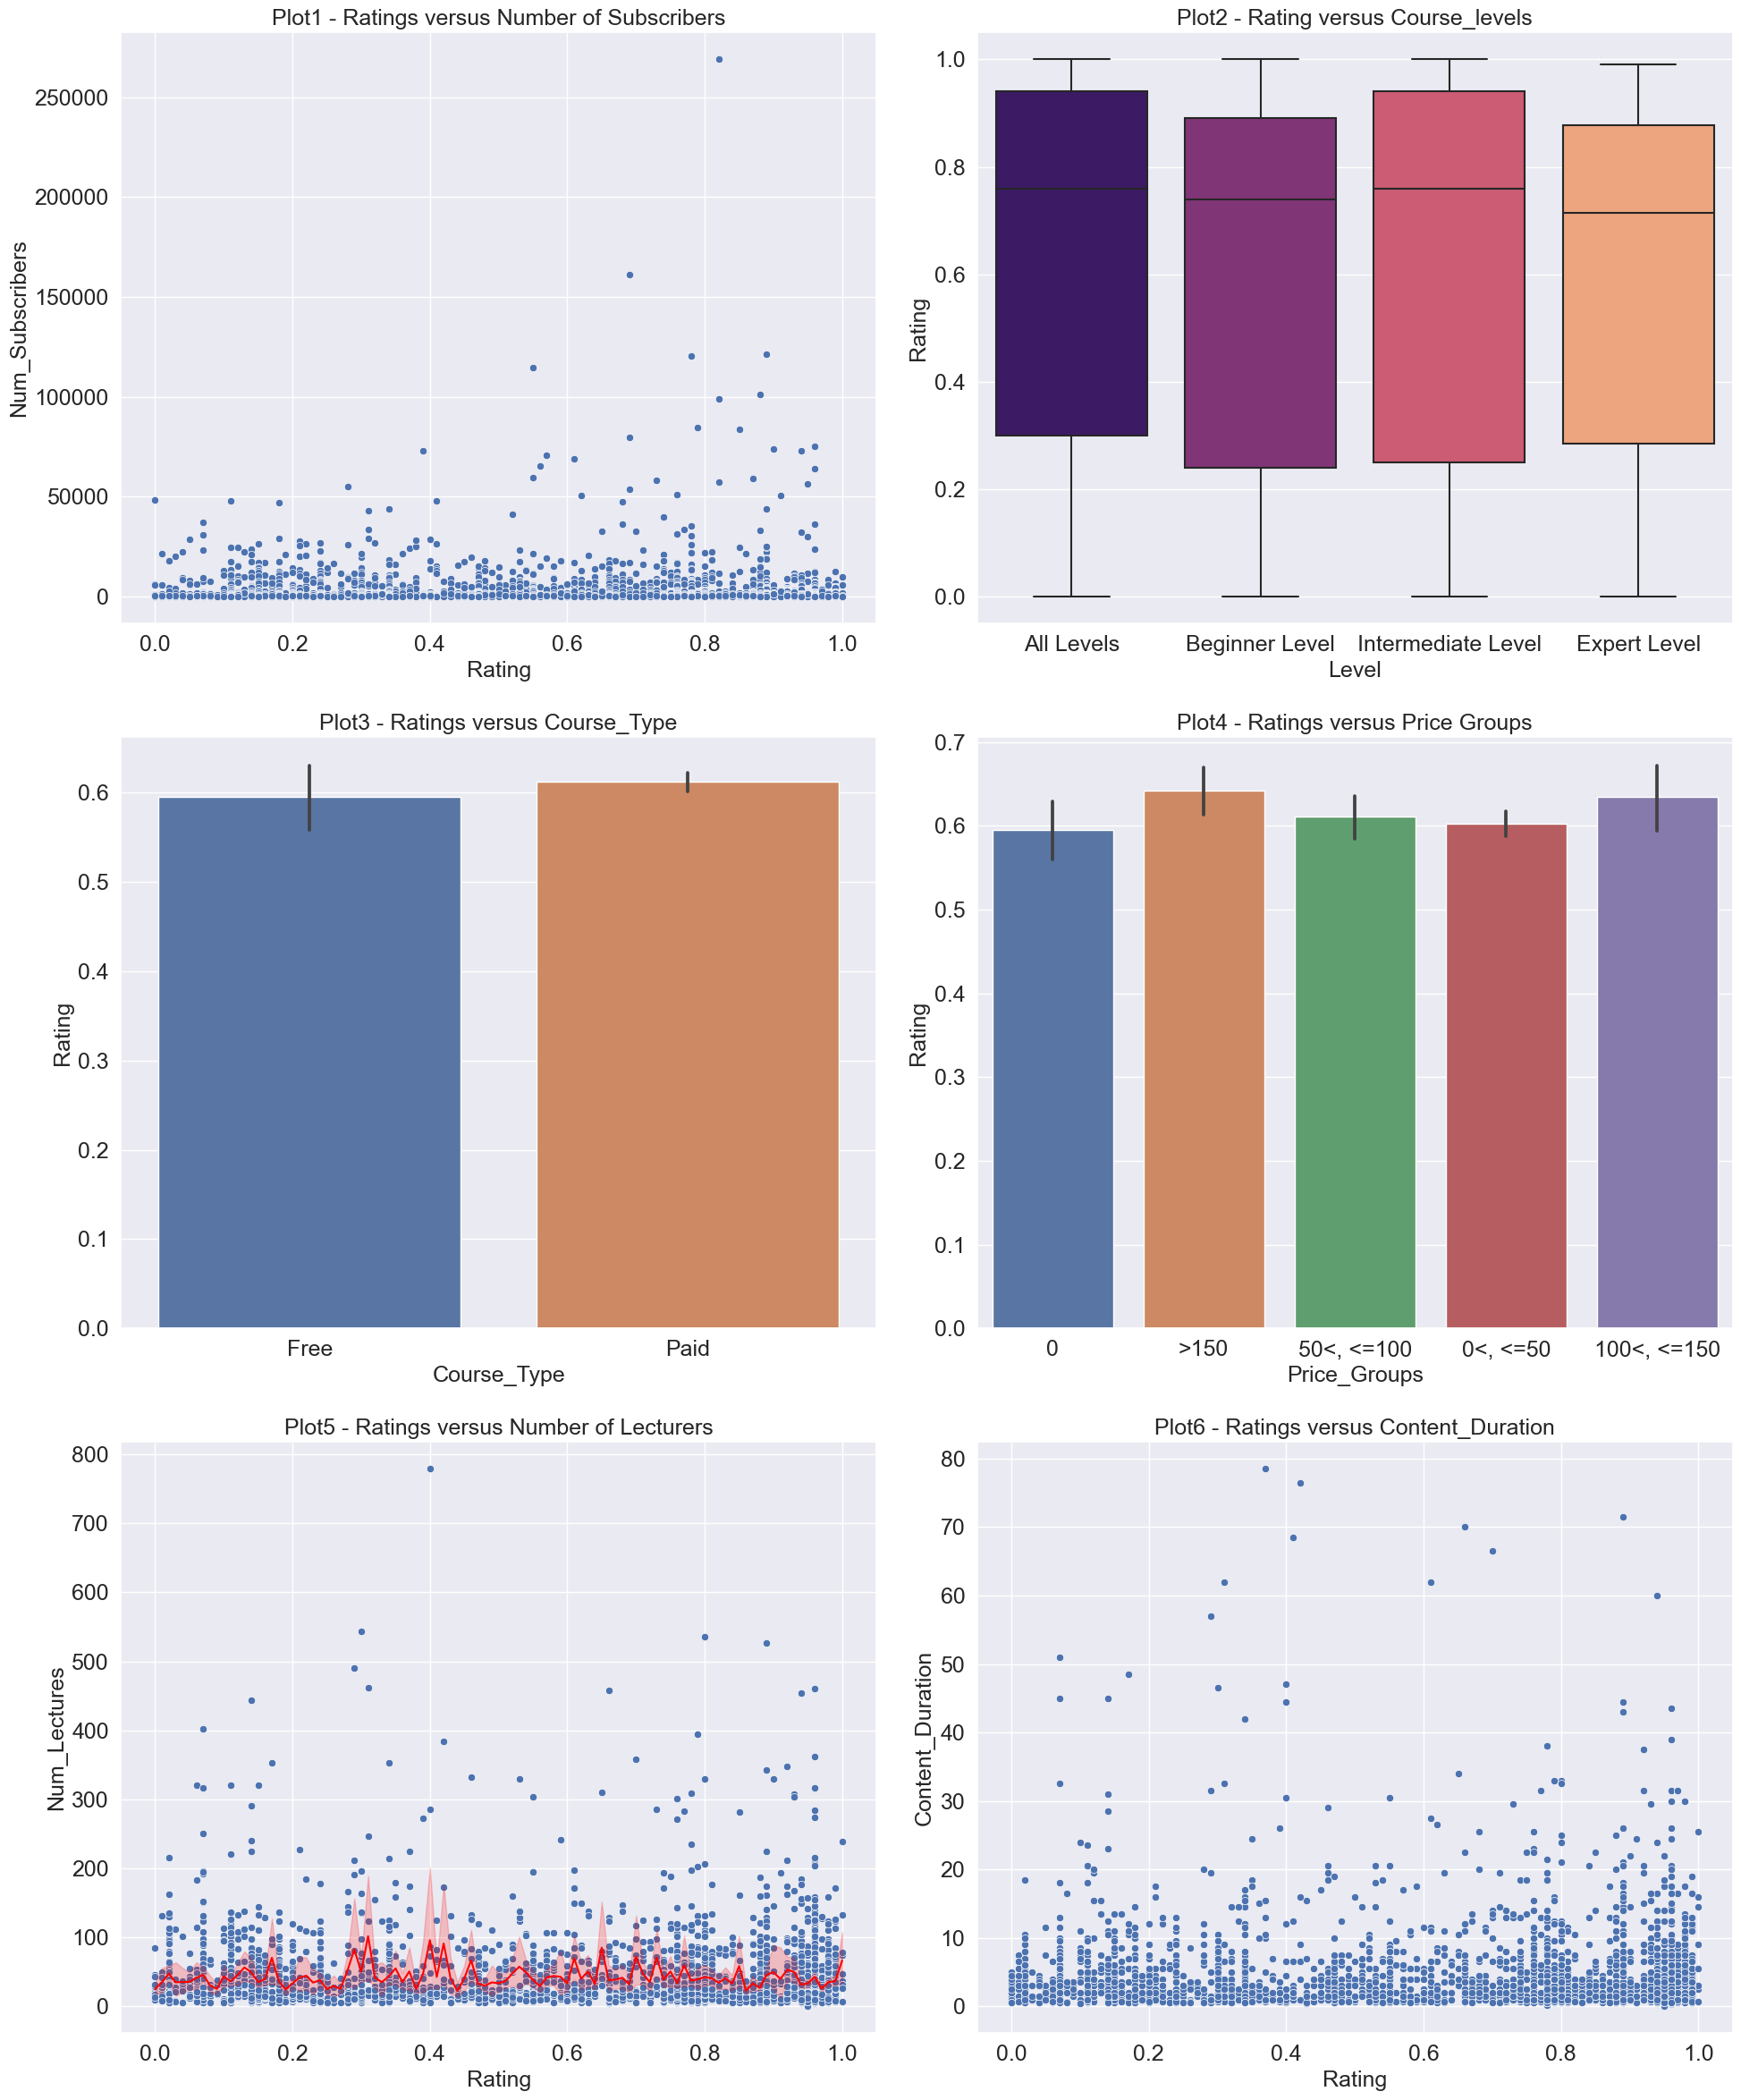

In [205]:
fig,axs = plt.subplots(nrows=3, ncols=2, figsize=(20,24))

sns.scatterplot(x='Rating', y='Num_Subscribers', data=data, palette='magma', ax=axs[0,0])
axs[0,0].set_title('Plot1 - Ratings versus Number of Subscribers');

sns.boxplot(x='Level', y='Rating', data=data, palette='magma', ax=axs[0,1])
axs[0,1].set_title('Plot2 - Rating versus Course_levels');

sns.barplot(x='Course_Type', y='Rating', data=data, ax=axs[1,0])
axs[1,0].set_title('Plot3 - Ratings versus Course_Type');

sns.barplot(x='Price_Groups', y='Rating', data=data, ax=axs[1,1])
axs[1,1].set_title('Plot4 - Ratings versus Price Groups');

sns.scatterplot(x='Rating', y='Num_Lectures', data=data, ax=axs[2,0])
sns.lineplot(x='Rating', y='Num_Lectures', data=data, ax=axs[2,0], color='red')
axs[2,0].set_title('Plot5 - Ratings versus Number of Lecturers');

sns.scatterplot(x='Rating', y='Content_Duration', data=data, ax=axs[2,1])
axs[2,1].set_title('Plot6 - Ratings versus Content_Duration');


# Format fontsize of labels, xticks, and yticks
sns.set(font_scale=2.0)
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()

Notes:
 - Plot1: In general, there is no clear linear relationship between the ratings and number of subscribers for most of the courses. however, there is a significant number of extreme cases (outliers) pertaining to subscriptions to the courses that have higher ratings than not.
 
 - Plot2: Courses at the Beginner and Expert levels have slightly lower ratings compared to those categorized as all levels and intermediate level
 
 - Plot3; Paid courses are slightly having higher ratings relative to the free courses. 
 
 - Plot4: In general, there is no large difference between the ratings across various price of courses, otherwise courses paid over 100 have a slightly advantage at scoring higher ratings
 
 - Plot5: In general, there is no clear cut relationship between the ratings and the number of lectures assigned for courses. However, there are few variations existing between the ratings 0.3 and 0.5 together with the significant number of outliers across all ratings
 
 - Plot6: There is similar pattern for the relationship of ratings and the number of contents, as observed in the plot 1(relationship between ratings and the number of subscribers), and plot 5 (relationship between ratings and the number of lecturers), 

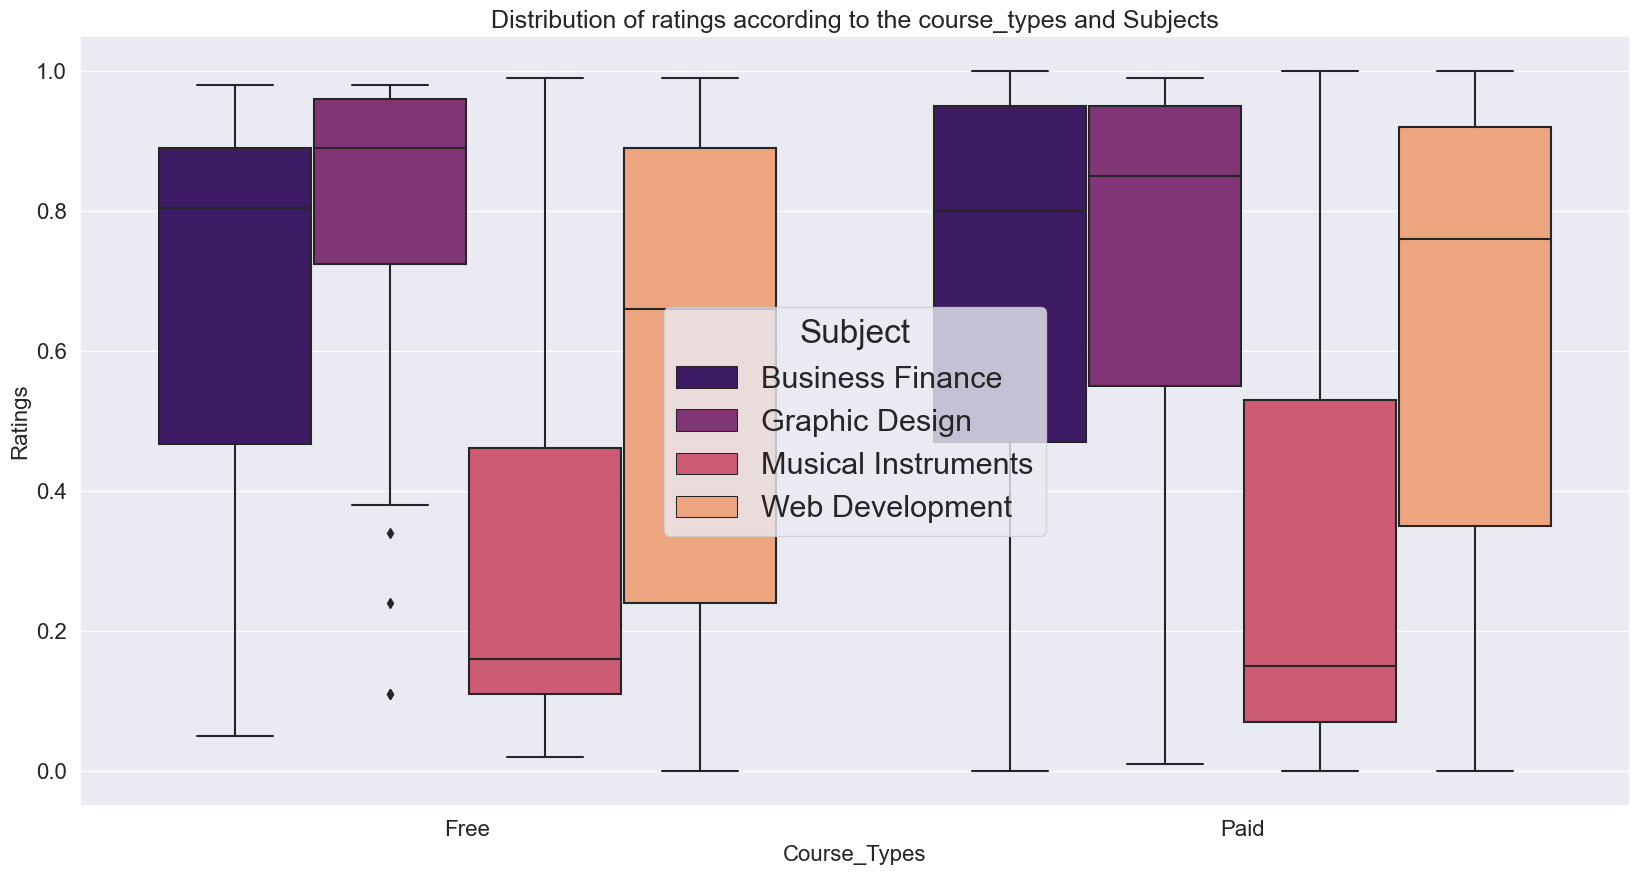

In [206]:
# Check correspondence between the ratings, type of courses and the subjects

plt.figure(figsize=(20,10))
sns.boxplot(x='Course_Type', y='Rating', data=data, palette='magma', hue='Subject')

plt.xlabel('Course_Types', fontsize=16)
plt.ylabel('Ratings', fontsize=16)
plt.title('Distribution of ratings according to the course_types and Subjects', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

Note: Higher ratings are given to the Graphic Design courses, followed up by Business Finance courses,Web Development, and Musical Instruments courses, respectively.
Also, there is a slightly higher ratings for the courses that paid compared to the free ones, with exception of the musical instrument courses which has the same ratings whether free or paid. and While, all the courses have shown to have a negative skewness with a number of extreme lower ratings, the Musical instruments courses is the only one which has shown to display a positive skewness with the a number of extreme higher ratings. 

Also, there are number of outliers in the ratings associated with the courses in Graphic Design.

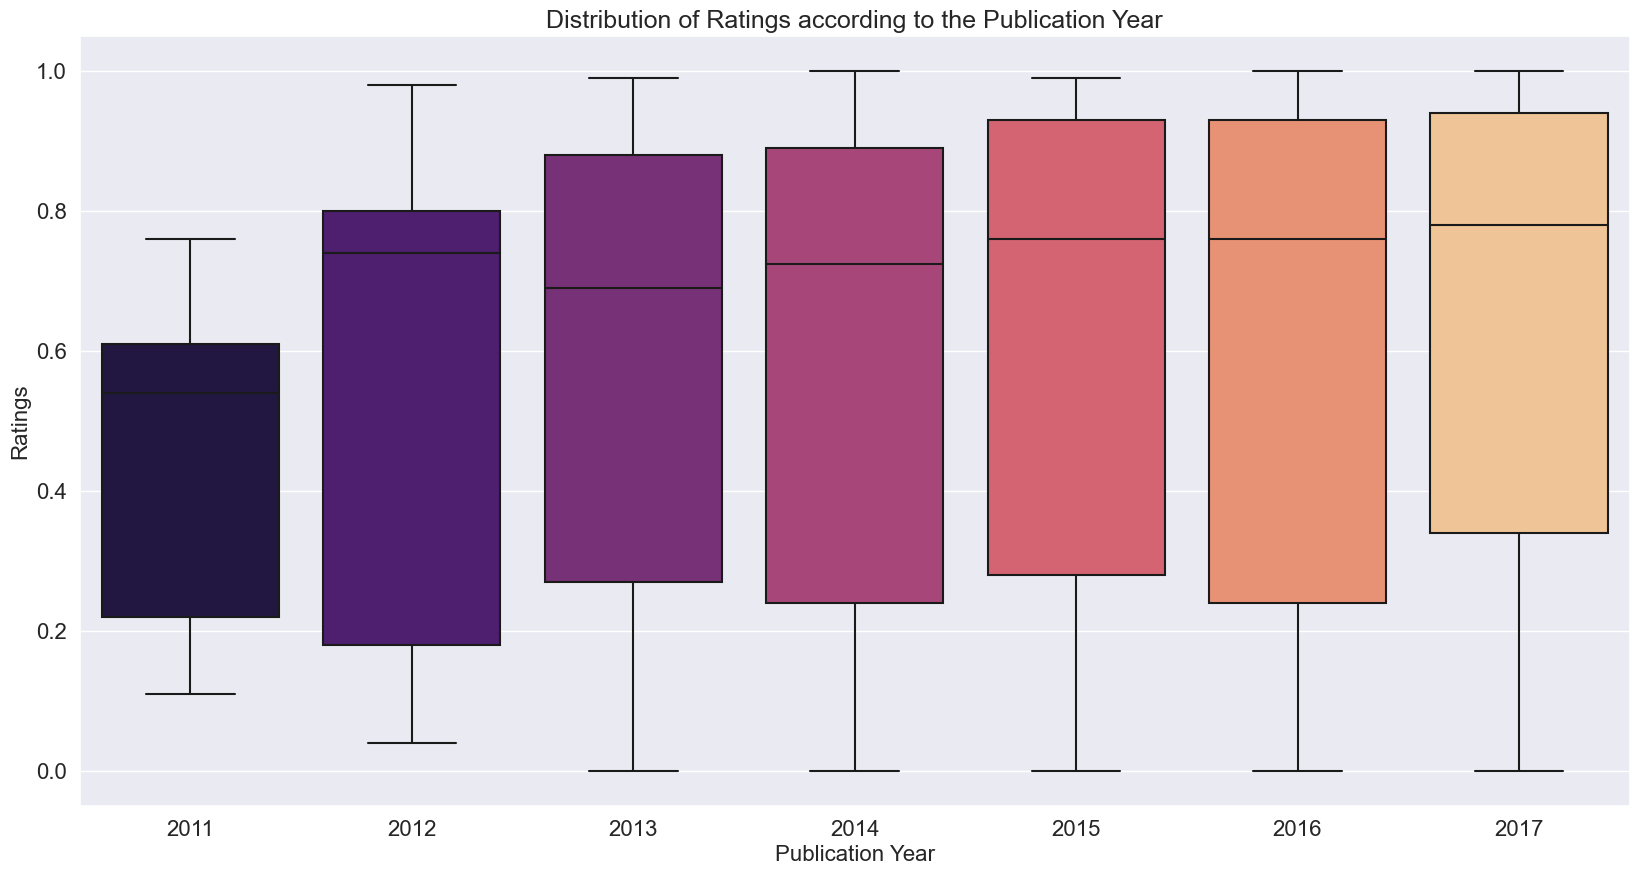

In [207]:
# Checking the rating and the 
# Check correspondence between the ratings, type of courses and the subjects

plt.figure(figsize=(20,10))
sns.boxplot(x='Year_Published', y='Rating', data=data, palette='magma')

plt.xlabel('Publication Year', fontsize=16)
plt.ylabel('Ratings', fontsize=16)
plt.title('Distribution of Ratings according to the Publication Year', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

Note: Higher ratings are given to the courses that were published in the later years.
Moreover, there is relatively smaller spread of ratings for courses that were published in the year 2011, and the year 2016 is shown to have published the courses with the largest spread of ratings.

<Figure size 800x600 with 0 Axes>

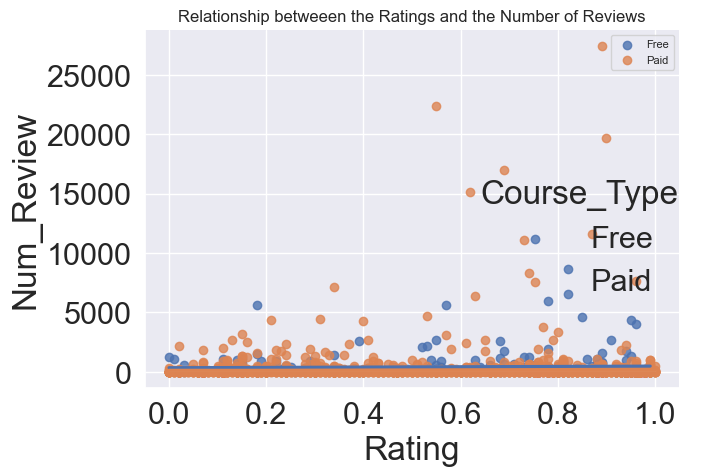

In [208]:
# Checking for linear relationship between the Number of Reviews and Ratings

plt.figure(figsize=(8,6))
sns.lmplot(x='Rating', y='Num_Review', data=data, hue='Course_Type')

plt.title('Relationship betweeen the Ratings and the Number of Reviews', fontsize=12)

# Set the font scale
sns.set(font_scale=1.2)

# Format the font size of the hue labels
plt.legend(fontsize=8)


plt.tight_layout()
plt.show()


Note: There is no clear linear relationship between the number of reviews and the ratings. However, (similar to the relationship between the ratings and the number of subscribers), there is a significant amount of outliers pertaining to large number of reviews for the courses with higher ratings, than not.

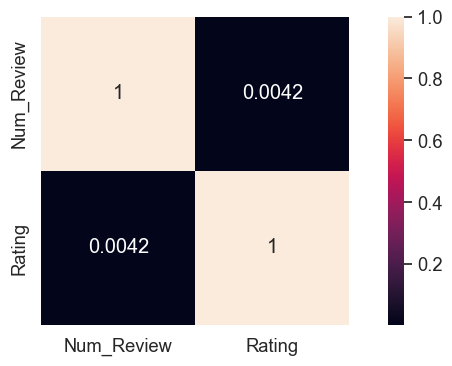

In [209]:
# Checking for correlation between the Number of Reviews and Ratings

fig,ax = plt.subplots(figsize=(10,4))
sns.heatmap(data[['Num_Review', 'Rating']].corr(), square=True, annot=True);

Note: There is no correlation between the number of reviews received about the course and the course rating, hence the course performance can only be measured by ratings and not by the number of reviews received.

##### Analysis of prices, revenue, and other associated features

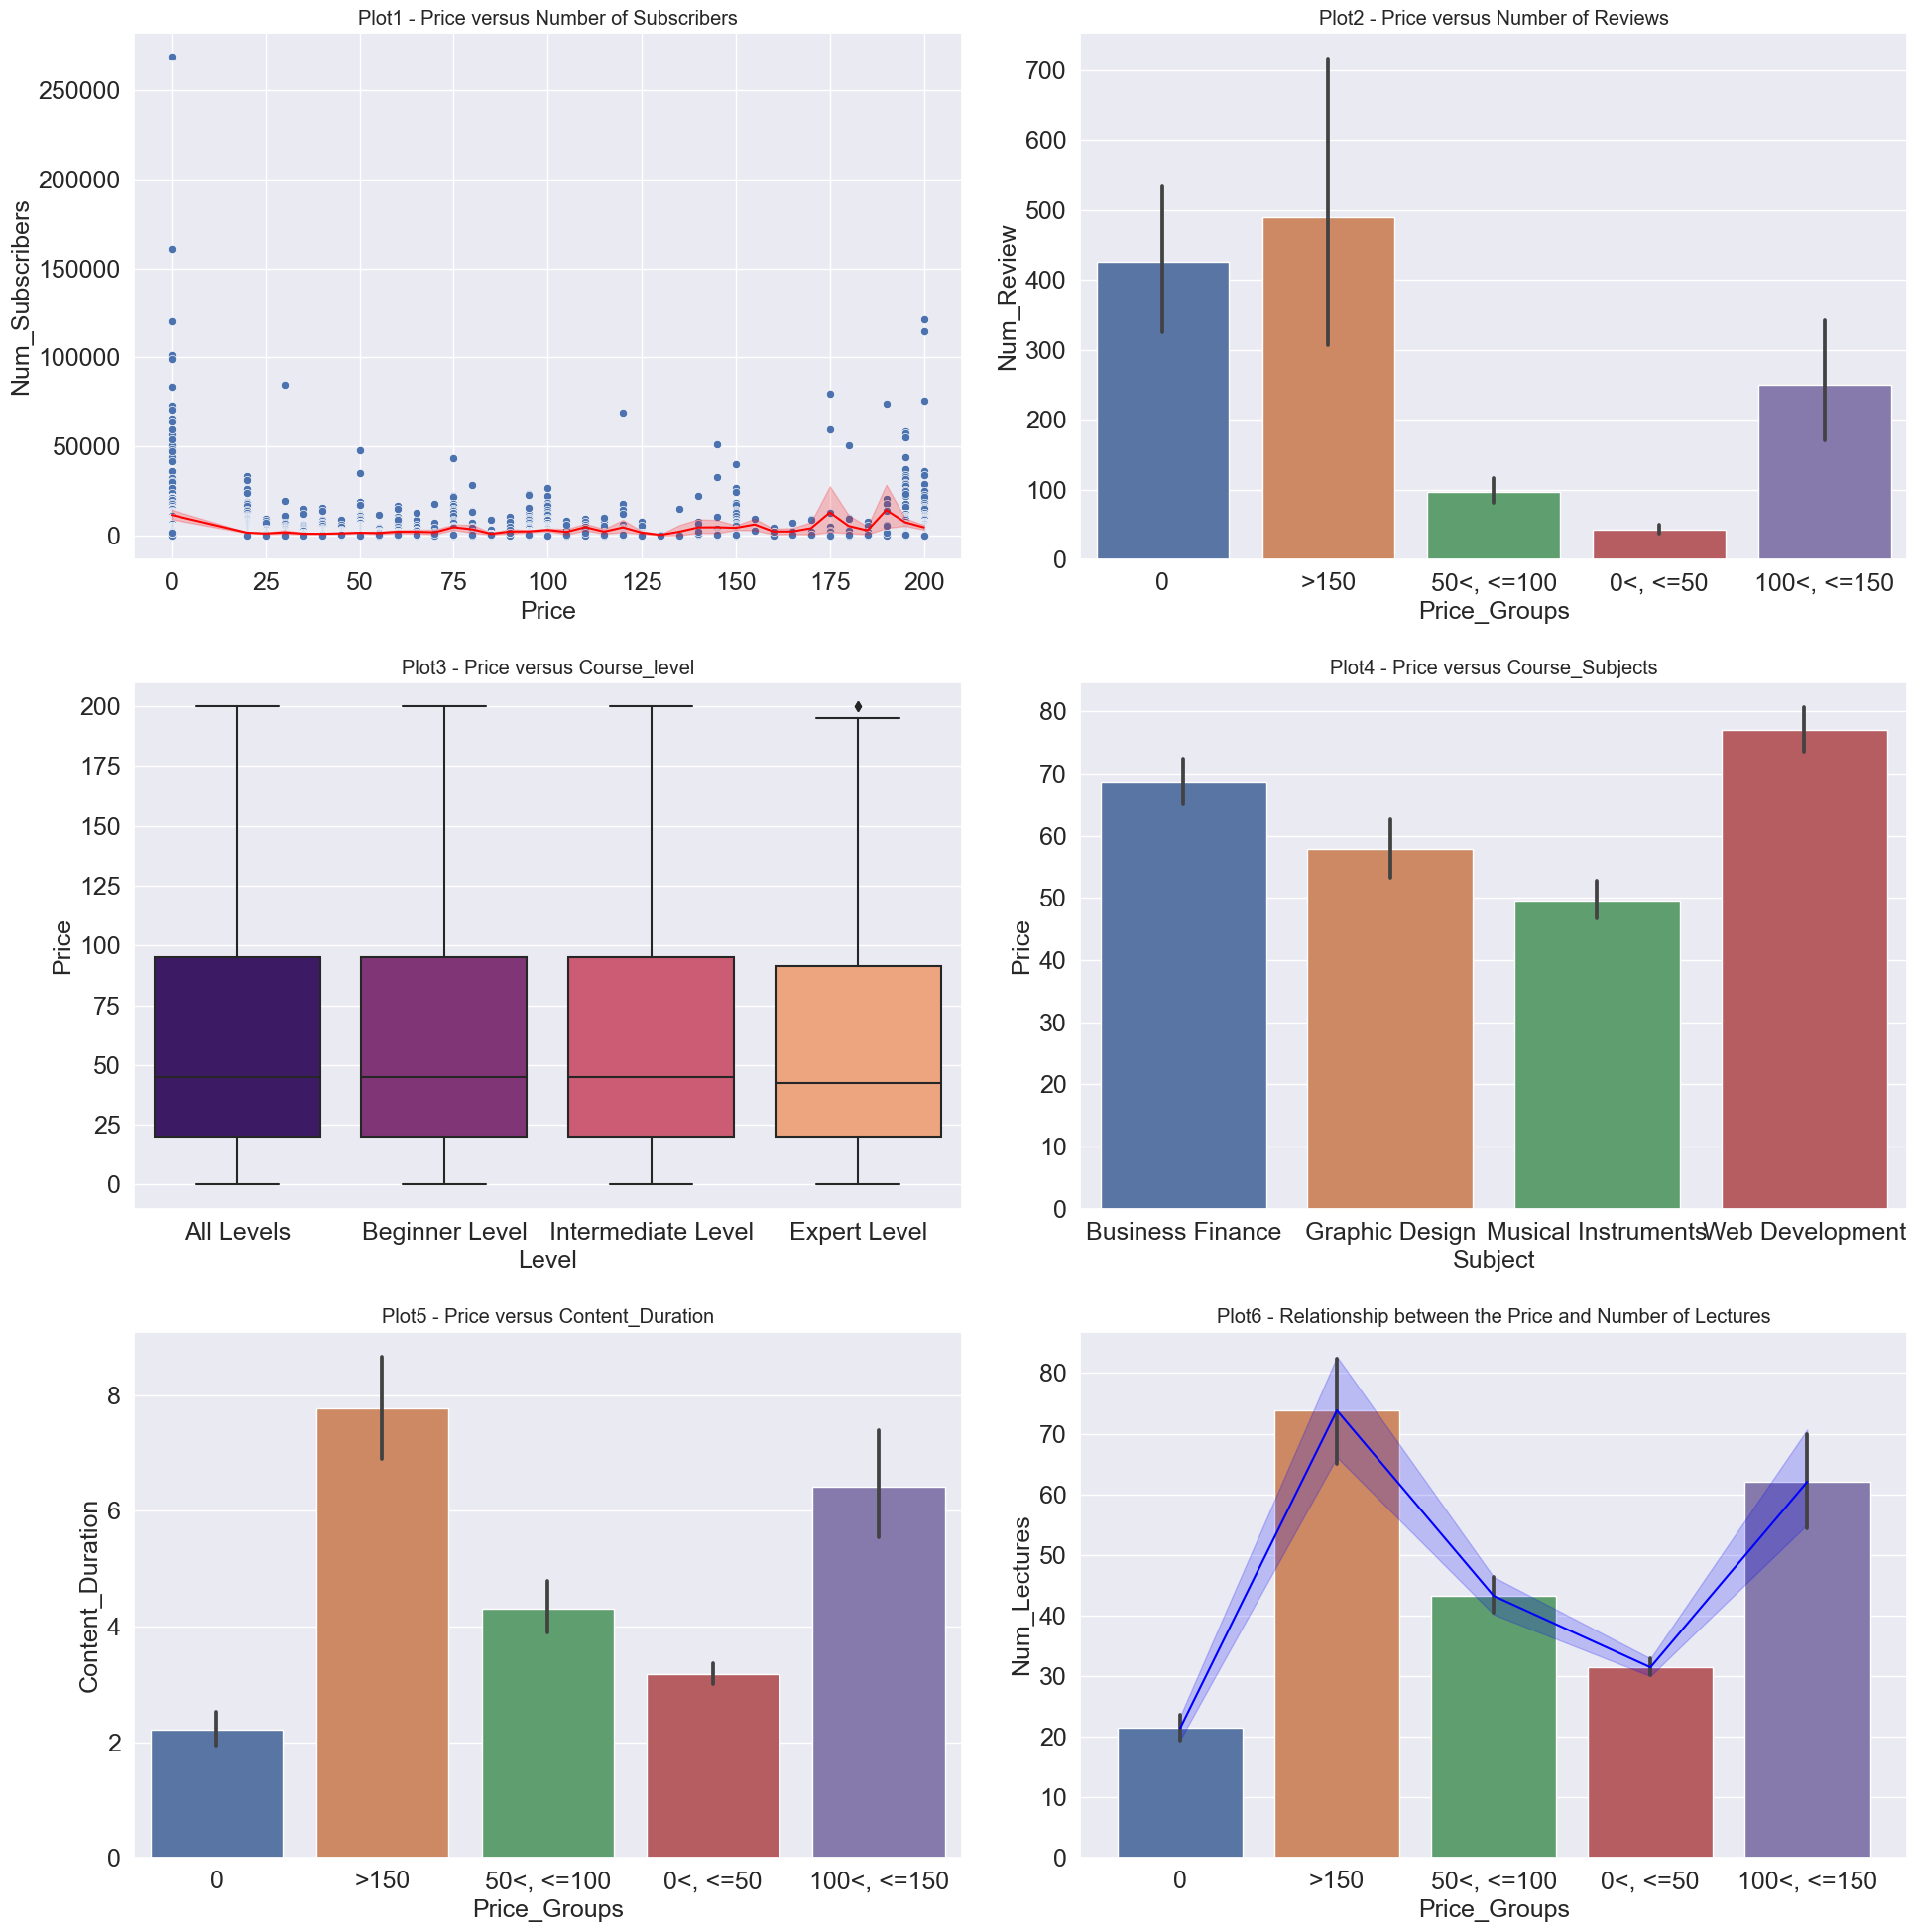

In [210]:
# checking relationships between the price and the other features

fig,axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

sns.scatterplot(x='Price', y='Num_Subscribers', data=data, ax=axs[0,0])
sns.lineplot(x='Price', y='Num_Subscribers', data=data, ax=axs[0,0], color='red')
axs[0,0].set_title('Plot1 - Price versus Number of Subscribers');

sns.barplot(x='Price_Groups', y='Num_Review', data=data, ax=axs[0,1])
axs[0,1].set_title('Plot2 - Price versus Number of Reviews');

sns.boxplot(x='Level', y='Price', data=data, palette='magma', ax=axs[1,0])
axs[1,0].set_title('Plot3 - Price versus Course_level');

sns.barplot(x='Subject', y='Price', data=data, ax=axs[1,1])
axs[1,1].set_title('Plot4 - Price versus Course_Subjects');

sns.barplot(x='Price_Groups', y='Content_Duration', data=data, ax=axs[2,0])
axs[2,0].set_title('Plot5 - Price versus Content_Duration');

sns.barplot(x='Price_Groups', y='Num_Lectures', data=data, ax=axs[2,1])
sns.lineplot(x='Price_Groups', y='Num_Lectures', data=data, ax=axs[2,1], color='blue')
axs[2,1].set_title('Plot6 - Relationship between the Price and Number of Lectures');

# Format fontsize of labels, xticks, and yticks
sns.set(font_scale=2.0)
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()


Notes:
- Plot1: Free courses have the most subscribers, followed up by courses priced around 175 and 200. However, there is no major difference in the number of subscriptions across various prices.

- Plot2: Courses priced above 150 have received the highest number of reviews, followed up free courses. However, the courses which are non-free and not exceeding 100 price have received significantly fewer reviews.

- Plot3: There is a no clear cut difference of average prices across all levels difficulty or proficiency, however, there prices have skewed towards the right where there are number of extreme prices for all levels. Moreover, prices have shown almost the same dispersion for all levels, with an exception of an outlier at expert level.

- Plot4: Web Development courses are priced the highest, followed up by the business finance, graphic design and the musical instrument courses, respectively.

- Plot5: Courses with the longest duration do have higher prices.

- Plot6: Courses with higher number of lectures have also the higher prices.

Hence, prices for course is observed to be highly associated with the amount of time taken to complete a particular course including the number of hours in contents and number of lecturers. Also, price is associated with the subject type of courses, where the Web Development courses have generally higher prices.
Free courses, have higher number of subscribers enrolling to the courses, while they also tend to receive a good number of reviews which second after the most priced courses (150 and above).

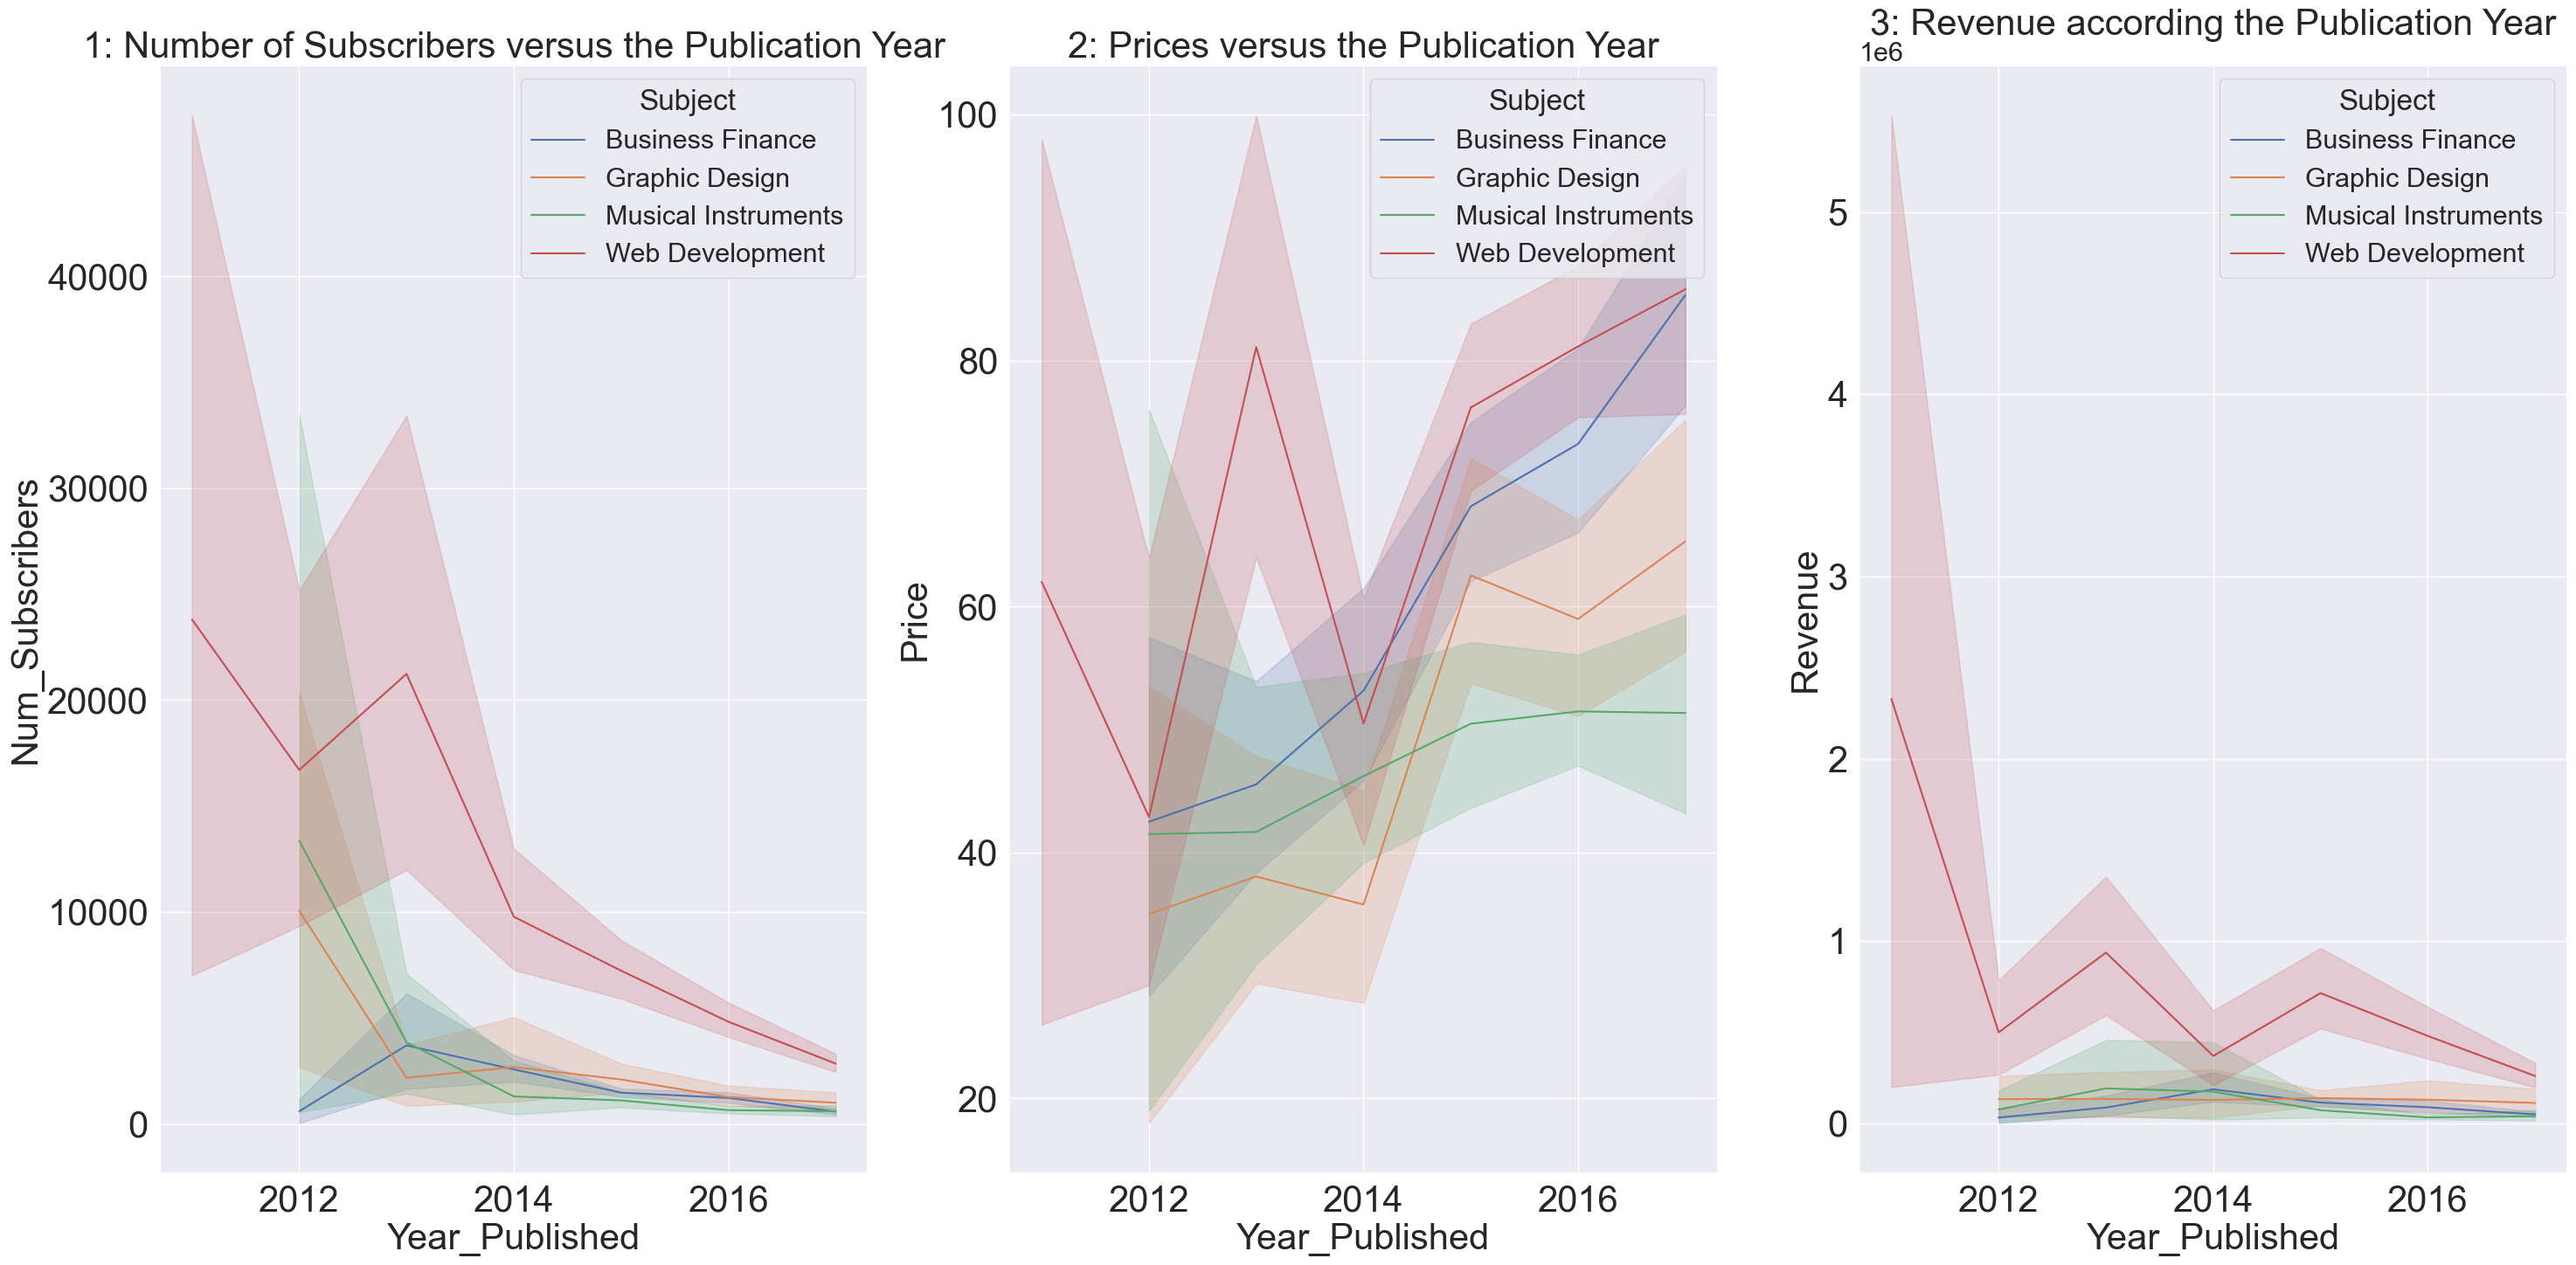

In [211]:
# Checking the rate of revenue as pertaining to the number of subcriptions and course_prices.

fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(30,15))

# Checking the relationship between the number of subscribers and the publication years
sns.lineplot(x="Year_Published", y='Num_Subscribers', data=data, hue='Subject', ax=axs[0])
axs[0].set_title('1: Number of Subscribers versus the Publication Year', fontsize=30)


# Check the revenue over the years as pertaining to the course publication
sns.lineplot(x='Year_Published', y='Price', data=data, hue='Subject', ax=axs[1])
axs[1].set_title('2: Prices versus the Publication Year', fontsize=30)


# Check the revenue over the years as pertaining to the course publication
sns.lineplot(x='Year_Published', y='Revenue', data=data, hue='Subject', ax=axs[2])
axs[2].set_title('3: Revenue according the Publication Year', fontsize=30)

# Format fontsize of labels, xticks, and yticks
sns.set(font_scale=2.0)
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=30)
    ax.set_ylabel(ax.get_ylabel(), fontsize=30)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)

plt.tight_layout()
plt.show()

Notes:
- Plot 1: The rate of subscriptions has been declining for all courses across all subjects over the years, except for in the year 2013 where there was a small spike of subscriptions for the courses in Web Development. 
The Web Development was the first course to be published and it has been having the largest number of subscribers in all the years. 
Although, all courses have had decline in subscriptions over the years, but there is stronger rate of decline in the following year after the publication for all courses except for the Business Finance courses. 
From the year 2014 there is a slower rate of decline for all courses irrespective of the subjects. 

- Plot 2: Web development courses have experienced a sharp fall of price in the year after its publication (i.e. 2012), but a sudden increase of price again in the next year i.e. 2013, other courses also had a slight increase of price in the year 2013 with exception of courses in musical instruments. All courses have seen an increase of price in the year 2017 relative to the year 2016.

- Plot 3: Although, the average prices for courses have increased since year 2015, but the revenue have been declining from that year, which is highly attributed to the falling  number of subscriptions.

<Figure size 1600x1200 with 0 Axes>

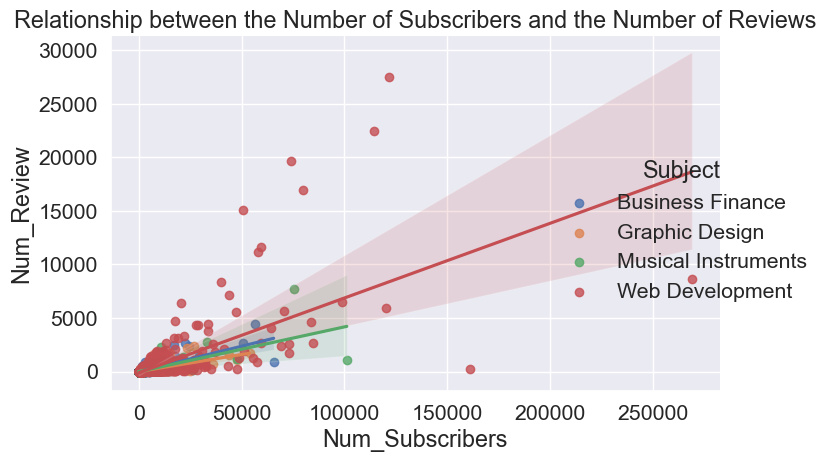

In [217]:
# Checking the relationship betweeen the Number of Subscribers and Number of Reviews

plt.figure(figsize=(16,12))
sns.lmplot(x='Num_Subscribers', y='Num_Review', data=data, hue='Subject');
plt.title("Relationship between the Number of Subscribers and the Number of Reviews");

# Format fontsize of labels, xticks, and yticks
sns.set(font_scale=1.6)
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel(ax.get_ylabel())
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

Note: There is clear positive & linear relationship between the number of reviews and the number of subscribers for the courses and their respective subjects. This shows that the higher the number of student enrolled to the course invites for the higher number of reviews as well.

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3675
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Course_ID            3672 non-null   int64         
 1   Num_Subscribers      3672 non-null   int64         
 2   Course_Title         3672 non-null   object        
 3   Price                3672 non-null   int64         
 4   Num_Review           3672 non-null   int64         
 5   Num_Lectures         3672 non-null   int64         
 6   Level                3672 non-null   object        
 7   Rating               3672 non-null   float64       
 8   Content_Duration     3672 non-null   float64       
 9   Published_Timestamp  3672 non-null   object        
 10  Subject              3672 non-null   object        
 11  Date_Published       3672 non-null   datetime64[ns]
 12  Course_Type          3672 non-null   object        
 13  Year_Published       3672 non-nul

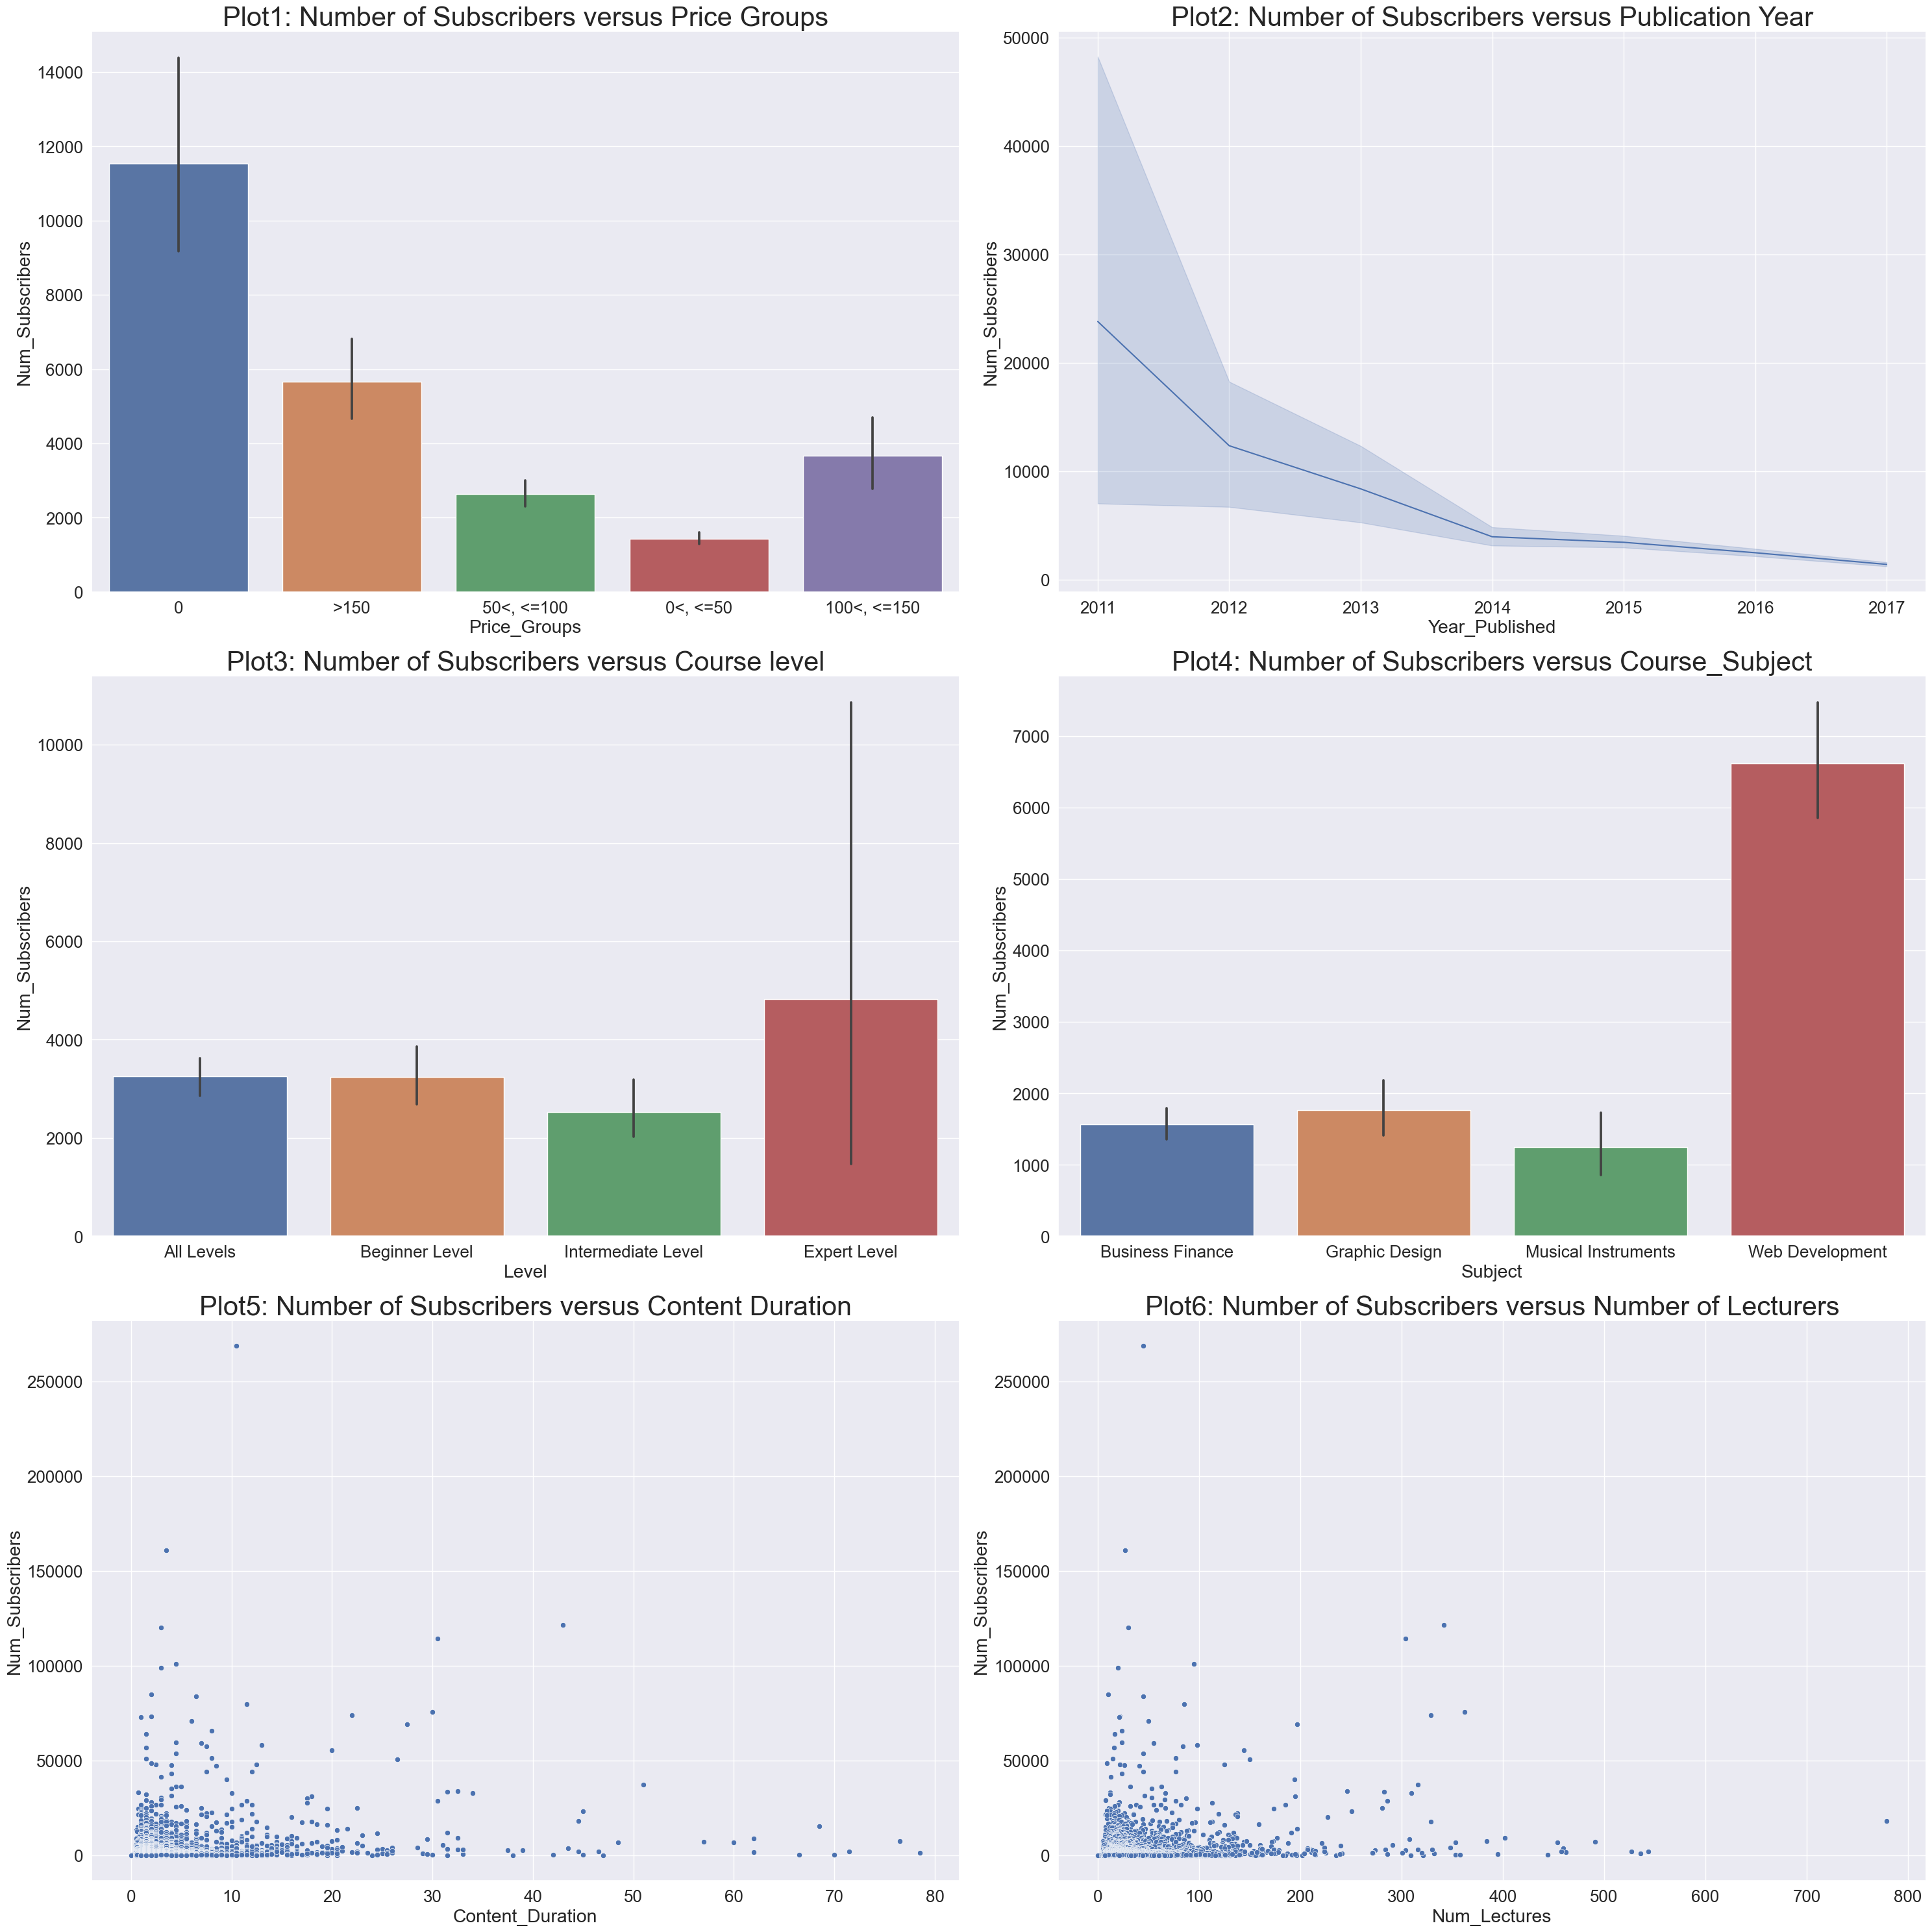

In [221]:
# Checking the relationship of subscriptions and other related features 

fig,axs = plt.subplots(nrows=3, ncols=2, figsize=(30,30))


sns.barplot(x="Price_Groups", y='Num_Subscribers', data=data, ax=axs[0,0])
axs[0,0].set_title('Plot1: Number of Subscribers versus Price Groups', fontsize=30)

sns.lineplot(x='Year_Published', y='Num_Subscribers', data=data, ax=axs[0,1])
axs[0,1].set_title('Plot2: Number of Subscribers versus Publication Year', fontsize=30)

sns.barplot(x='Level', y='Num_Subscribers', data=data, ax=axs[1,0])
axs[1,0].set_title('Plot3: Number of Subscribers versus Course level', fontsize=30)

sns.barplot(x='Subject', y='Num_Subscribers', data=data, ax=axs[1,1])
axs[1,1].set_title('Plot4: Number of Subscribers versus Course_Subject', fontsize=30)

sns.scatterplot(x='Content_Duration', y='Num_Subscribers', data=data, ax=axs[2,0])
axs[2,0].set_title('Plot5: Number of Subscribers versus Content Duration', fontsize=30)

sns.scatterplot(x='Num_Lectures', y='Num_Subscribers', data=data, ax=axs[2,1])
axs[2,1].set_title('Plot6: Number of Subscribers versus Number of Lecturers', fontsize=30)


# Format fontsize of labels, xticks, and yticks
sns.set(font_scale=1.2)
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel())
    ax.set_ylabel(ax.get_ylabel())
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

plt.tight_layout()
plt.show()

Notes: 
- Plot1: Free courses have had the highest number of subscribers. Apart from that, the number of subscribers changed by increasing as the price of the course increases, where the courses priced atleast 150 have had a high number of subscibers, followed up in a decreasing order.

- Plot2: In general, the courses have declining rate of subscription over the years from 2011 to 2017. There is a steep decline of subscriptions from 2011 to 2014, and then, the declining rate slowed down between years 2015 and 2017.

- Plot3: Expert level courses have the highest number of subscriptions, followed up by all levels, and beginner level and intermediate level, respectively.

- Plot4: Web Development courses have the highest number of subscriptions, followed up by Graphic Design, Business Finance and Musical Instrumental courses, respectively.

- Plot5 & 6: Number of subscriptions is inversely proportional to the content durations, where the courses with the less amount of time to complete the course is observed to have a higher number of subscriptions, A significant number of outliers exist as well for courses with the content duration not exceeding 50.

- Plot 6: As observed in the plot5 above, the number of subscribers also is negative relationship with the number of lecturers to be taken. Courses with less amount of lecturers have experienced more subscriptions, and the vice versa is true.

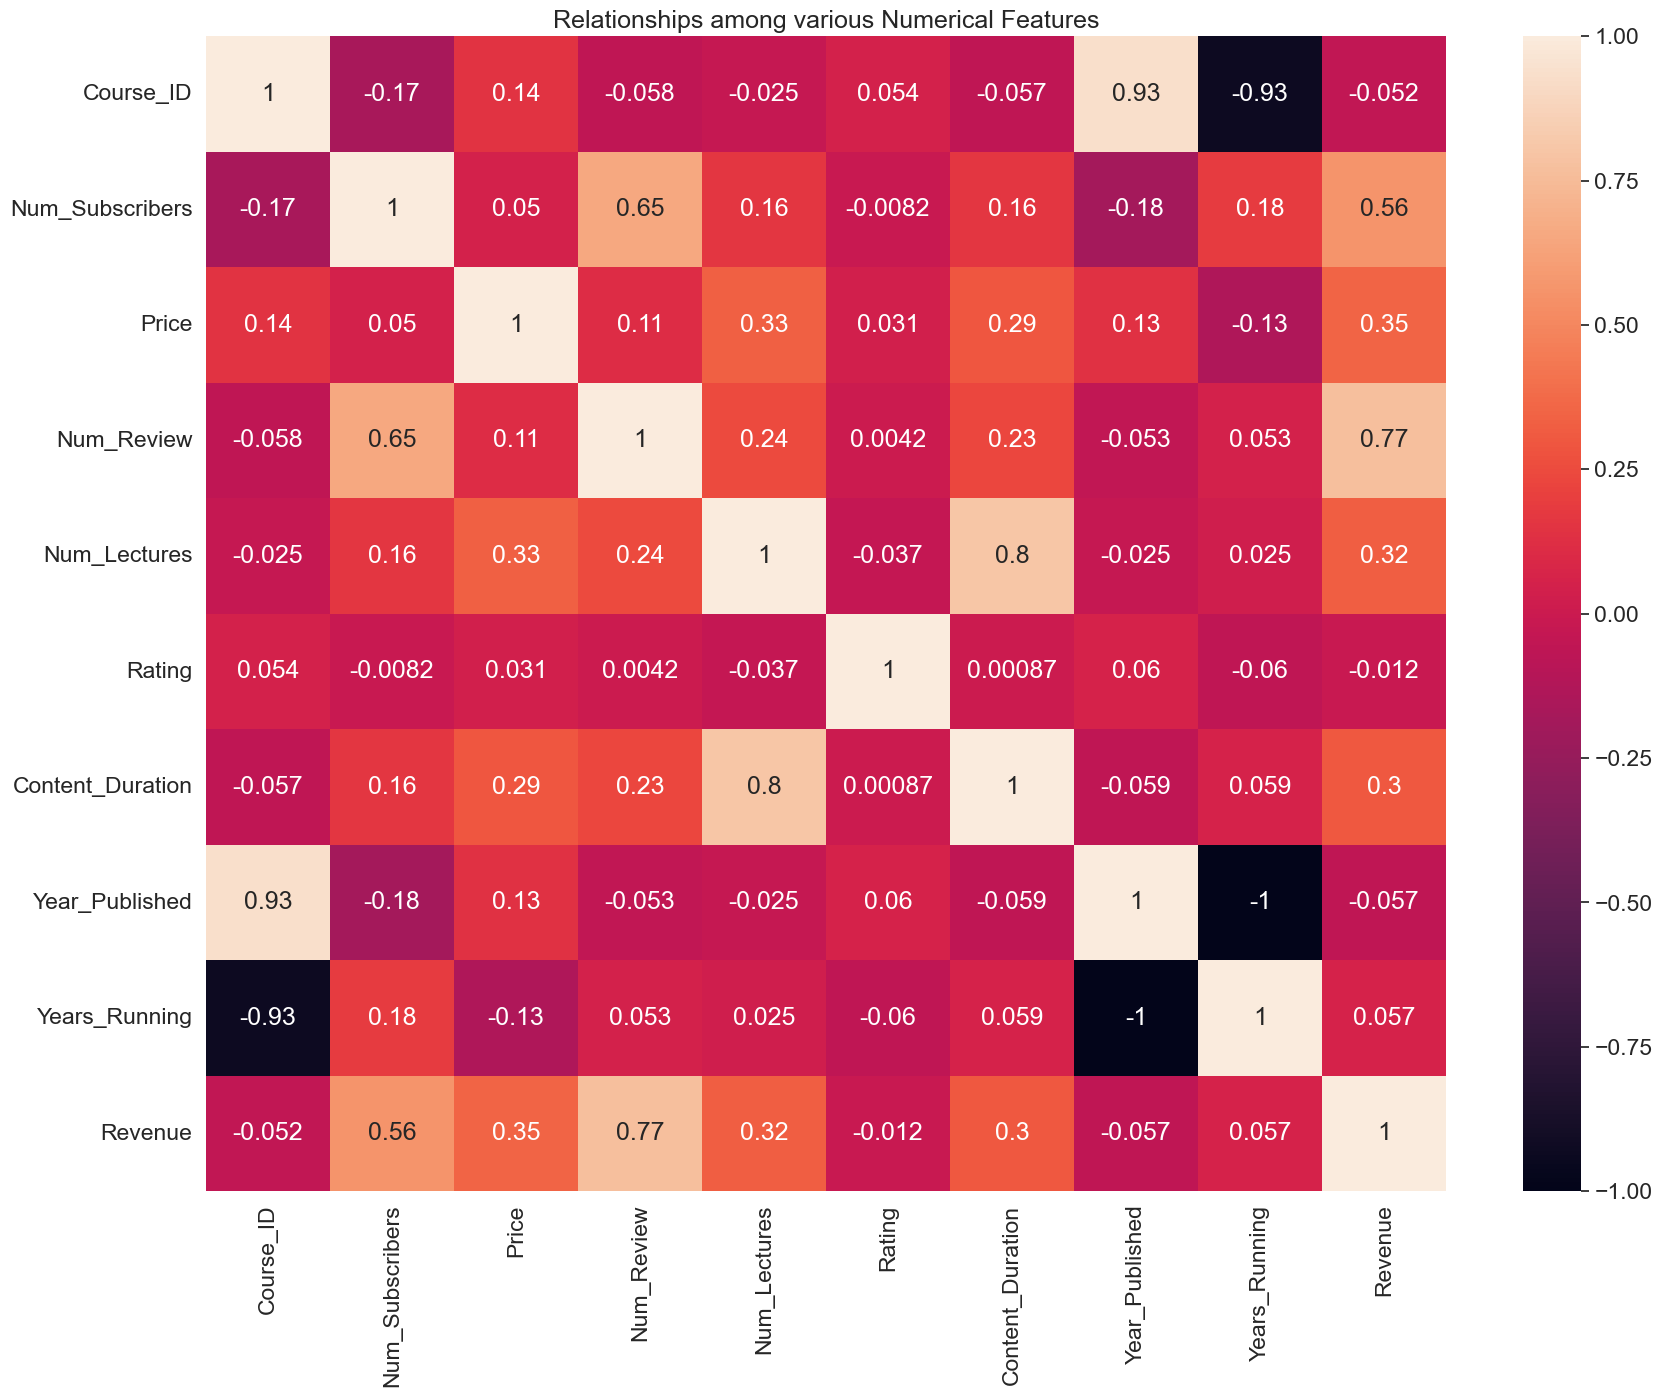

In [215]:
# Checking for correlations among numerical features

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.title("Relationships among various Numerical Features");

Notes: There are different levels of correlations between features: strong, moderate and lower correlations.
 - Content_Duration and Number of lecturers is having a high correlation coefficient, which implies that the more the number of lectures is related to the high overall time taken to complete the course
 - Price has relatively moderate correlation to the revenue, which implies that higher prices may not lead to  higher revenue, but the high revenue is determined mostly by the number of subscribers and the number of reviews which shows a strong correlation
 - Ratings have shown to have relatively low correlation to all other features including the price.
 - Price is not highly correlated by any other features, whereas the content-duration and the number of lectures have the most but yet moderate influence to the price.
 - Number of Reviews is highly correlated to the number of subscribers, which implies that the more the higher the enrollment led to the more reviews.


Conclusion:

Performance of courses can be evaluated mainly by the ratings, and partly by the number of subscribers which informs the number of students enrolled in the courses. On the business revenue it is provided that the number of subscribers have more impact on the revenue than the price set for each course. The following is the summary findings pertaining to the key features:

- Rating
Ratings are observed to be generally higher for the paid courses than the free ones, especially the courses priced on the higher end (i.e. atleast 100). More to that, ratings are found to be similar for the free courses and those paid on the lower end (i.e. not exceeding 50). 
There is not clear disparity for ratings in various course levels, however, ratings are highest for courses related to subjects of graphic design followed up business finance. Ratings are not influenced by the number of lecturers or the amount of time taken to complete the course. And, despite the fact that the ratings are not correlated to the number of subscibers, there is still a marginal relationship between the extreme values of subscribptions and the number of reviews associated with higher ratings than not.

- Number of Subscribers
Courses in the Web Development have seen the highest number of subscription over the years, however the overall rate of subscriptions for all courses has been on decline particularly since the year 2014 which is also described by a steep rise of course prices in the proceeding year and onwards. Free course have the highest number of subscriptions followed up by the high end paid courses (i.e. atleast 150), and the least subscriptions rate is observed for courses paid not more than 50. Also, the expert level courses have the largest number of subscriptions which are priced at the similar rates as other course levels. Courses with the less total amount of time taken to complete the courses have the higher number of subscriptions, and the vice versa is true.

- Course prices
Price is seen be steadily influenced by the total amount of time taken to complete courses judged by the number of lectures and the content_duration. The courses with higher amount of time to complete also have the higher prices, and the vice versa is true.
The high end paid course (i.e. atleast 150) do have the most of reviews followed up by the free courses. Courses under the Web Development are priced the highest followed up by the Business finance and graphic design, which also have seen the highest amount of subscriptions. 

Revenue is observed to be more reliant on the number of subscriptions than the specific course price. from the year 2015 the revenue has been on decline which is described by the fall in the number of subscribers and the increased prices  for all courses. Since the courses with most amount of time taken to complete the courses also do have the higher prices and lower subscriptions, there is a need to reduce the number of courses with longer durations and many lectures which can reduce the price and increase the number of subscriptions and the total revenue.